## Problema 2

Reproduce la Fig. 6.4. Investiga el mal condicionamiento mediante: (a) evaluando el número de condición de la matriz de Vandermonde, y (b) definiendo los puntos de Chebyshev sin el signo negativo al frente (es decir, en orden opuesto) y comparando los gráficos ampliados.


C:\Users\nagai\AppData\Local\Temp\ipykernel_9448\131468903.py:35: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return lambda xx: np.sum(y[i]*L(i, xx) for i in range(len(x)))


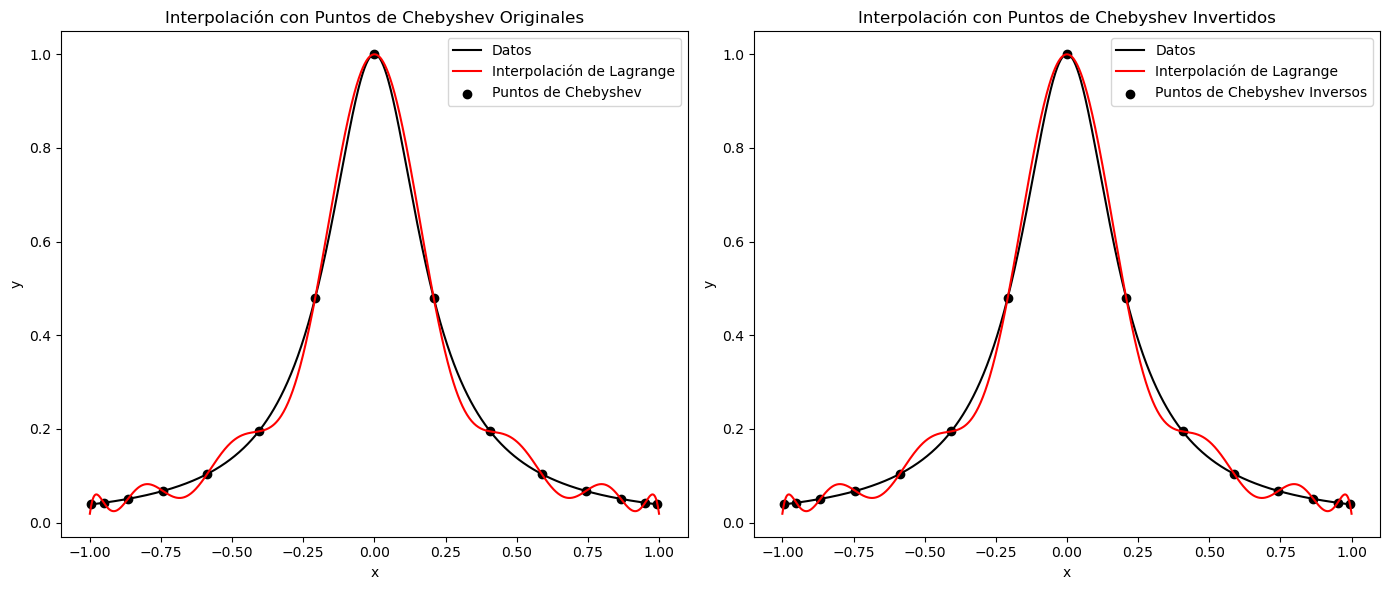

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función para evaluar la matriz de Vandermonde dado un conjunto de valores x
def matriz_vandermonde(x):
    n = len(x)
    V = np.column_stack([x**i for i in range(n)])
    return V

# Función para calcular el número de condición de una matriz
def numero_condicion(matriz):
    return np.linalg.cond(matriz)

# Definir los puntos de Chebyshev
n = 15  # número de puntos; asumido a partir del gráfico
a, b = -1, 1  # intervalo; asumido a partir del gráfico
puntos_chebyshev = np.array([np.cos((2*i + 1) * np.pi / (2 * n)) for i in range(n)])

# Calcular la matriz de Vandermonde y su número de condición
V = matriz_vandermonde(puntos_chebyshev)
numero_cond = numero_condicion(V)

# Invertir el orden de los puntos de Chebyshev (sin el signo negativo)
puntos_chebyshev_inversos = puntos_chebyshev[::-1]

# Calcular la matriz de Vandermonde para los puntos de Chebyshev invertidos y su número de condición
V_inversa = matriz_vandermonde(puntos_chebyshev_inversos)
numero_cond_inverso = numero_condicion(V_inversa)

# Interpolación de Lagrange
def interpolacion_lagrange(x, y):
    def L(i, xx):
        terminos = [(xx - x[j])/(x[i] - x[j]) for j in range(len(x)) if i != j]
        return np.prod(terminos, axis=0)
    return lambda xx: np.sum(y[i]*L(i, xx) for i in range(len(x)))

# Necesitamos evaluar los polinomios en una malla densa de puntos dentro del intervalo
x_denso = np.linspace(a, b, 1000)

# Asumiremos que la función que estamos interpolando es f(x) = 1 / (1 + 25x^2)
# que es un ejemplo común de función utilizada en problemas de interpolación.
f = lambda x: 1 / (1 + 25 * x**2)
y_original = f(puntos_chebyshev)
y_inverso = f(puntos_chebyshev_inversos)

# Crear polinomios interpolantes de Lagrange para ambos conjuntos de puntos
L_original = interpolacion_lagrange(puntos_chebyshev, y_original)
L_inverso = interpolacion_lagrange(puntos_chebyshev_inversos, y_inverso)

# Evaluar los polinomios interpolantes en la malla densa
L_valores_originales = L_original(x_denso)
L_valores_inversos = L_inverso(x_denso)

# Graficar la interpolación utilizando los puntos de Chebyshev originales
plt.figure(figsize=(14, 6))

# Graficar el gráfico izquierdo (puntos originales)
plt.subplot(1, 2, 1)
plt.plot(x_denso, f(x_denso), 'k', label='Datos')
plt.plot(x_denso, L_valores_originales, 'r', label='Interpolación de Lagrange')
plt.scatter(puntos_chebyshev, y_original, color='k', label='Puntos de Chebyshev')
plt.title('Interpolación con Puntos de Chebyshev Originales')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Graficar el gráfico derecho (puntos invertidos)
plt.subplot(1, 2, 2)
plt.plot(x_denso, f(x_denso), 'k', label='Datos')
plt.plot(x_denso, L_valores_inversos, 'r', label='Interpolación de Lagrange')
plt.scatter(puntos_chebyshev_inversos, y_inverso, color='k', label='Puntos de Chebyshev Inversos')
plt.title('Interpolación con Puntos de Chebyshev Invertidos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


## Problema 5

Utiliza los puntos de Chebyshev y la interpolación de Lagrange para:
(a) $f(x) = e^{\sin(20x)}$ (para $n = 15$ y $n = 60$),
(b) $f(x) = 100(x - 1)^3 \cos(4(x - 1)) e^{5(x-1)}$ (para $n = 7$ y $n = 15$).

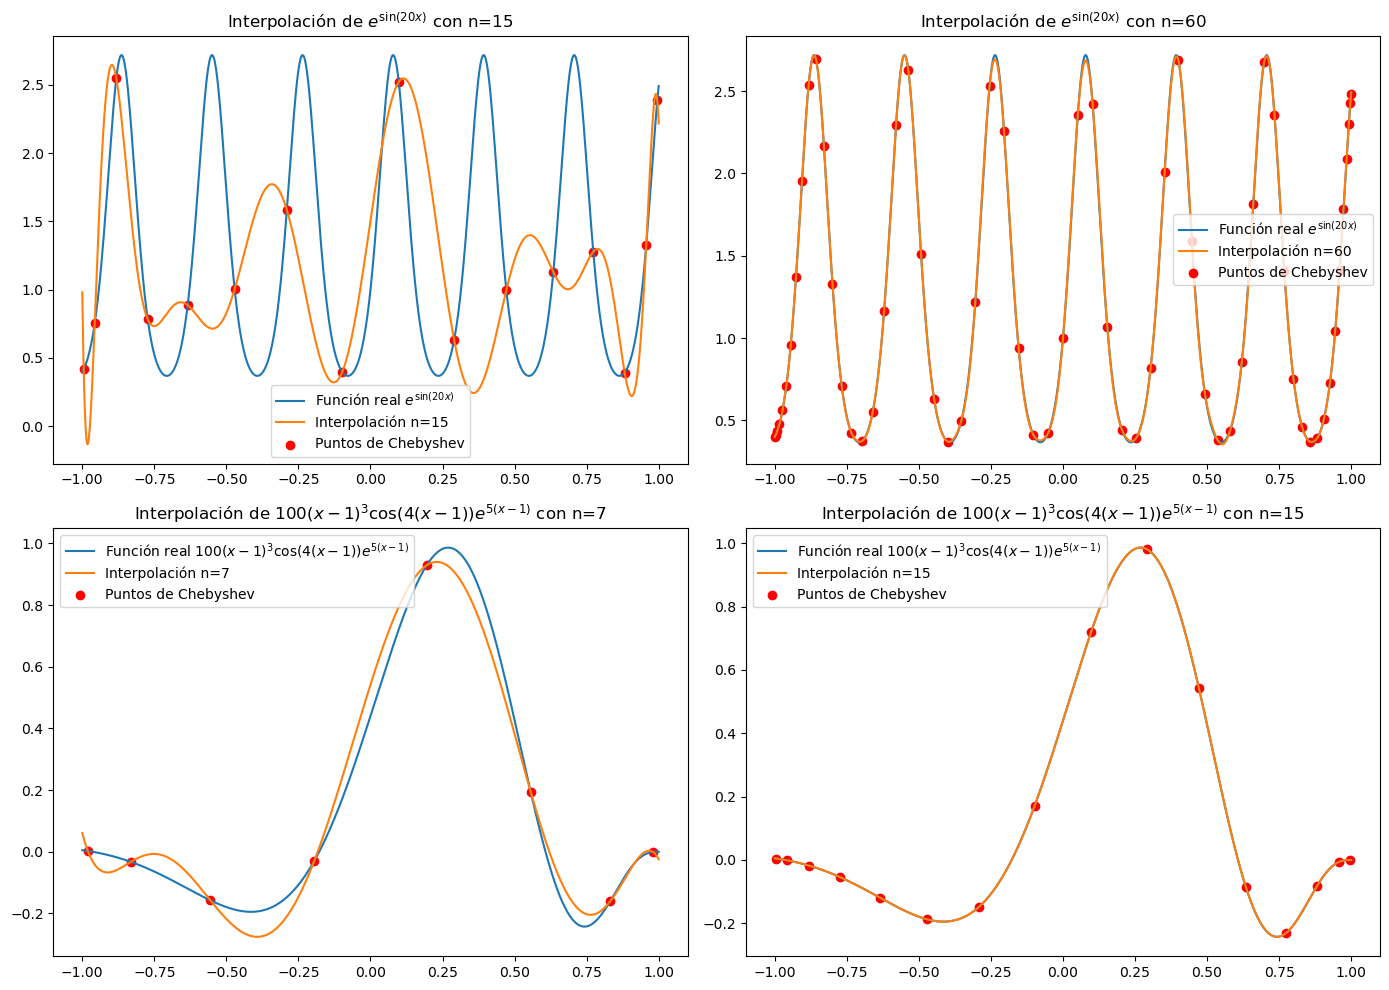

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular los puntos de Chebyshev
def puntos_chebyshev(n):
    return np.cos((np.pi * (2 * np.arange(n + 1) + 1)) / (2 * (n + 1)))

# Función para calcular la interpolación de Lagrange
def interpolacion_lagrange(x, x_puntos, y_puntos):
    n = len(x_puntos)
    P = np.zeros_like(x)
    for i in range(n):
        L = np.ones_like(x)
        for j in range(n):
            if i != j:
                L *= (x - x_puntos[j]) / (x_puntos[i] - x_puntos[j])
        P += y_puntos[i] * L
    return P

# Definir las funciones a interpolar
def funcion_a(x):
    return np.exp(np.sin(20 * x))

def funcion_b(x):
    return 100 * (x - 1)**3 * np.cos(4 * (x - 1)) * np.exp(5 * (x - 1))

# Intervalo y número de puntos para el gráfico
rango_x = np.linspace(-1, 1, 1000)

# Puntos de Chebyshev y valores de la función
valores_n_a = [15, 60]
interpolaciones_a = []
puntos_cheb_a = []
for n in valores_n_a:
    puntos_cheb = puntos_chebyshev(n)
    puntos_cheb_a.append((puntos_cheb, funcion_a(puntos_cheb)))
    interpolacion = interpolacion_lagrange(rango_x, puntos_cheb, funcion_a(puntos_cheb))
    interpolaciones_a.append(interpolacion)

# Parte b
valores_n_b = [7, 15]
interpolaciones_b = []
puntos_cheb_b = []
for n in valores_n_b:
    puntos_cheb = puntos_chebyshev(n)
    puntos_cheb_b.append((puntos_cheb, funcion_b(puntos_cheb)))
    interpolacion = interpolacion_lagrange(rango_x, puntos_cheb, funcion_b(puntos_cheb))
    interpolaciones_b.append(interpolacion)

# Preparar la visualización
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Graficar para la parte (a)
for i, n in enumerate(valores_n_a):
    ax[0, i].plot(rango_x, funcion_a(rango_x), label="Función real $e^{\\sin(20x)}$")
    ax[0, i].plot(rango_x, interpolaciones_a[i], label=f"Interpolación n={n}")
    ax[0, i].scatter(*puntos_cheb_a[i], color='red', label='Puntos de Chebyshev')
    ax[0, i].set_title(f"Interpolación de $e^{{\\sin(20x)}}$ con n={n}")
    ax[0, i].legend()

# Graficar para la parte (b)
for i, n in enumerate(valores_n_b):
    ax[1, i].plot(rango_x, funcion_b(rango_x), label="Función real $100(x-1)^3 \\cos(4(x-1))e^{5(x-1)}$")
    ax[1, i].plot(rango_x, interpolaciones_b[i], label=f"Interpolación n={n}")
    ax[1, i].scatter(*puntos_cheb_b[i], color='red', label='Puntos de Chebyshev')
    ax[1, i].set_title(f"Interpolación de $100(x-1)^3 \\cos(4(x-1))e^{{5(x-1)}}$ con n={n}")
    ax[1, i].legend()

plt.tight_layout()
plt.show()


## Problema 8

En el problema 6.7 exploramos "experimentalmente" la diferencia entre el uso de nodos equidistantes y nodos de Chebyshev en el polinomio de nodos, es decir, lo que aparece en la expresión del error en la interpolación de Lagrange, Ec. ($6.38$). Ahora te ayudaremos a demostrar que los nodos de Chebyshev realmente minimizan el valor máximo del polinomio de nodos; esto se conoce como la propiedad de minimización máxima de los polinomios de Chebyshev.
(a) Usa la relación de recurrencia en Ec. ($2.122$) para mostrar que el coeficiente principal del polinomio de Chebyshev $T_n(x)$ es $\frac{2^{n-1}}{2}$.

(b) Define el polinomio de Chebyshev mónico $\widetilde{T}_n(x) = \frac{2}{1-n}T_n(x)$ y calcula los valores de $\widetilde{T}_n(x)$ en los $n + 1$ extremos de $T_n(x)$—modifica la Ec. ($2.124$.

(c) Demuestra por contradicción que un polinomio mónico $p_n(x)$ de grado $n$ cumple:
$$
\max_{-1 \leq x \leq +1} |p_n(x)| \geq \frac{2}{1-n} \quad (6.238)
$$
Para hacerlo, examina cuántas raíces tiene el polinomio $\widetilde{T}_n(x) - p_n(x)$ en $[-1, +1]$.
Pista: distingue entre mínimos y máximos (es decir, valores de $j$).

(d) Usa la Ec. ($2.123$) para mostrar que $|\widetilde{T}_n(x)| \leq \frac{2}{1-n}$ y concluye así que el mínimo del máximo mostrado en Ec. ($6.238$) se alcanza con $\widetilde{T}_n(x)$. Hemos logrado lo que buscábamos, es decir, demostramos que el uso de nodos de Chebyshev conduce a la minimización del valor máximo del polinomio de nodos.


# Análisis de Polinomios de Chebyshev

## (a) Coeficiente principal del polinomio de Chebyshev $T_n(x)$

El coeficiente principal del polinomio de Chebyshev $T_n(x)$ es $2^{n-1}$ para $n \geq 1$, y 1 para $n=0$. Este coeficiente surge del término de mayor grado en el polinomio, que para $n \geq 1$ es $2^{n-1}x^n$.

## (b) Polinomio de Chebyshev monico $\tilde{T}_n(x)$

Definimos el polinomio de Chebyshev monico como $\tilde{T}_n(x) = \frac{T_n(x)}{2^{n-1}}$. Calculamos los valores de $\tilde{T}_n(x)$ en los $n+1$ extremos de $T_n(x)$, los cuales están dados por $x_j = \cos\left(\frac{j\pi}{n}\right)$ para $j = 0, 1, \dots, n$. En estos puntos, $\tilde{T}_n(x_j) = \frac{(-1)^j}{2^{n-1}}$.

## (c) Valor máximo mínimo absoluto de un polinomio monico

Afirmamos que cualquier polinomio monico $p_n(x)$ de grado $n$ debe satisfacer:

$$\max_{x \in [-1, 1]} |p_n(x)| \geq \frac{1}{2^{n-1}}$$

Supongamos por contradicción que existe un polinomio monico $p_n(x)$ tal que:

$$\max_{x \in [-1, 1]} |p_n(x)| < \frac{1}{2^{n-1}}$$

Consideremos $\tilde{T}_n(x) - p_n(x)$. Si $|p_n(x)|$ siempre es menor que $|\tilde{T}_n(x)|$ sobre $[-1, 1]$, entonces $\tilde{T}_n(x) - p_n(x)$ no puede mantener un signo constante, indicando más de $n$ raíces, lo cual contradice el teorema fundamental del álgebra.

## (d) Límites en $|\tilde{T}_n(x)|$ y propiedad minimax

Usando la expresión $T_n(x) = \cos(n \cos^{-1}(x))$, encontramos:

$$|\tilde{T}_n(x)| = \left|\frac{\cos(n \cos^{-1}(x))}{2^{n-1}}\right| \leq \frac{1}{2^{n-1}}$$

sobre $[-1, 1]$. Por lo tanto, $\tilde{T}_n(x)$ no solo satisface la desigualdad sino que lo hace con igualdad, minimizando así el valor máximo del polinomio nodal sobre $[-1, 1]$, demostrando la propiedad minimax de los nodos de Chebyshev en la interpolación polinomial.


## Problema 11

Imagina que no hubiéramos introducido la interpolación de Hermite en el texto principal. Intenta determinar un polinomio interpolador que satisfaga las siguientes condiciones:

$p(0) = 2$ 

$p(1) = -5$

$p'(0) = -5$ 

$p'(1) = -8$

Luego, repite el cálculo usando la interpolación de Hermite, Ec. ($6.49$).


### Construcción Manual del Polinomio Interpolante

Dadas las condiciones:
- $p(0) = 2$
- $p(1) = -5$
- $p'(0) = -5$
- $p'(1) = -8$

Necesitamos construir un polinomio $p(x)$ que satisfaga estas condiciones.

Asumamos un polinomio cúbico $p(x) = ax^3 + bx^2 + cx + d$.

Usando las condiciones dadas, podemos establecer el siguiente sistema de ecuaciones:

1. $p(0) = d = 2$
2. $p(1) = a + b + c + d = -5$
3. $p'(0) = c = -5$
4. $p'(1) = 3a + 2b + c = -8$

Sustituyendo $d = 2$ y $c = -5$ en las ecuaciones:

1. $d = 2$
2. $a + b - 5 + 2 = -5$ simplifica a $a + b - 3 = -5$, así $a + b = -2$
3. $c = -5$
4. $3a + 2b - 5 = -8$ simplifica a $3a + 2b = -3$

Ahora tenemos el sistema de ecuaciones:

1. $a + b = -2$
2. $3a + 2b = -3$

Resolviendo este sistema, multiplicamos la primera ecuación por 2:

$2a + 2b = -4$

Restando esto de la segunda ecuación:

$(3a + 2b) - (2a + 2b) = -3 + 4$
$a = 1$

Sustituyendo $a = 1$ en $a + b = -2$:

$1 + b = -2$
$b = -3$

Así, el polinomio es $p(x) = x^3 - 3x^2 - 5x + 2$.

### Usando Interpolación de Hermite

Para construir el polinomio interpolante usando interpolación de Hermite, usamos la fórmula de interpolación de Hermite:

$p(x) = \sum_{k=0}^{n-1} \left[ y_k \left(1 + 2L_k'(x_k)(x_k - x)\right) L_k^2(x) + y_k'(x - x_k) L_k^2(x) \right]$

Dado puntos de datos y derivadas:
- $x_0 = 0, y_0 = 2, y_0' = -5$
- $x_1 = 1, y_1 = -5, y_1' = -8$

Primero, necesitamos los polinomios base de Lagrange $L_k(x)$ y sus derivadas.

Para $n = 2$:
$L_0(x) = \frac{x - x_1}{x_0 - x_1} = 1 - x$
$L_1(x) = \frac{x - x_0}{x_1 - x_0} = x$

Las derivadas son:
$L_0'(x) = -1$
$L_1'(x) = 1$

Ahora, podemos calcular $L_k^2(x)$:
$L_0^2(x) = (1 - x)^2 = 1 - 2x + x^2$
$L_1^2(x) = x^2$

A continuación, calculamos $L_k'(x_k)$:
$L_0'(x_0) = L_0'(0) = -1$
$L_1'(x_1) = L_1'(1) = 1$

Ahora podemos sustituir estos valores en la fórmula de interpolación de Hermite:

$p(x) = y_0 \left[1 + 2L_0'(x_0)(x_0 - x)\right] L_0^2(x) + y_0'(x - x_0) L_0^2(x) + y_1 \left[1 + 2L_1'(x_1)(x_1 - x)\right] L_1^2(x) + y_1'(x - x_1) L_1^2(x)$

Sustituyendo los valores:

$p(x) = 2 \left[1 + 2(-1)(0 - x)\right] (1 - 2x + x^2) + (-5)(x - 0)(1 - 2x + x^2) + (-5) \left[1 + 2(1)(1 - x)\right] x^2 + (-8)(x - 1)x^2$

Simplificando cada término:

$p(x) = 2 \left[1 - 2x\right] (1 - 2x + x^2) - 5x (1 - 2x + x^2) - 5 (3 - 2x) x^2 - 8 (x - 1) x^2$

Combinamos y simplificamos para obtener el polinomio final. Esto debería dar el mismo polinomio $p(x) = x^3 - 3x^2 - 5x + 2$ como se derivó manualmente, confirmando que ambos métodos son consistentes.


## Problema 14

Implementa el enfoque del spline de tres nodos monomiales, según la Ec. (6.59), y compáralo con la salida de splines.py para $n = 3$. Hazlo para muchos valores de $x$, lo que lleva a una versión $n = 3$ del panel izquierdo en la Fig. 6.7.


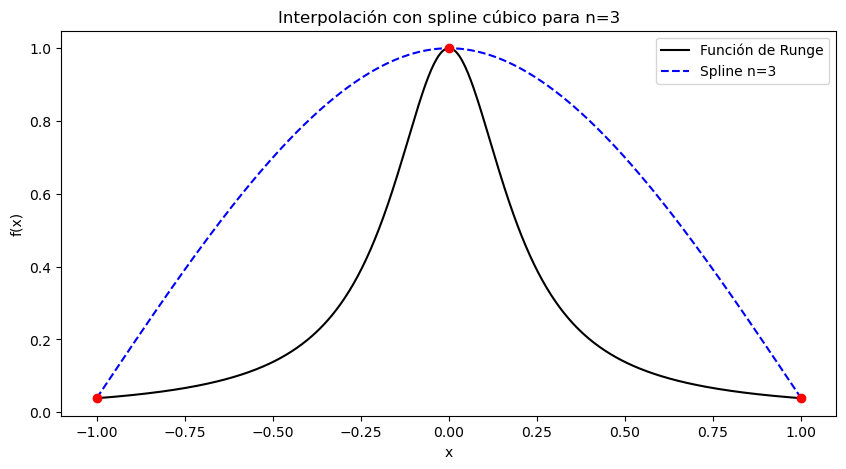

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Definir la función de Runge
def funcion_runge(x):
    return 1 / (1 + 25 * x**2)

# Definir los puntos para n = 3
x_puntos = np.linspace(-1, 1, 3)
y_puntos = funcion_runge(x_puntos)

# Crear la matriz A basada en la ecuación (6.59) dada
A = np.zeros((8, 8))
b = np.zeros(8)

# Rellenar la matriz A y el vector b basados en la ecuación dada
A[0, :4] = [1, x_puntos[0], x_puntos[0]**2, x_puntos[0]**3]
A[1, :4] = [1, x_puntos[1], x_puntos[1]**2, x_puntos[1]**3]
A[2, 4:] = [1, x_puntos[1], x_puntos[1]**2, x_puntos[1]**3]
A[3, 4:] = [1, x_puntos[2], x_puntos[2]**2, x_puntos[2]**3]

b[:4] = [y_puntos[0], y_puntos[1], y_puntos[1], y_puntos[2]]

A[4, :4] = [0, 1, 2 * x_puntos[1], 3 * x_puntos[1]**2]
A[4, 4:] = [0, -1, -2 * x_puntos[1], -3 * x_puntos[1]**2]

A[5, :4] = [0, 0, 2, 6 * x_puntos[1]]
A[5, 4:] = [0, 0, -2, -6 * x_puntos[1]]

A[6, 2] = 2
A[6, 3] = 6 * x_puntos[0]
A[7, 6] = 2
A[7, 7] = 6 * x_puntos[2]

# Resolver el sistema
coeficientes = solve(A, b)
c0, c1, c2, c3, d0, d1, d2, d3 = coeficientes

# Definir las funciones del spline
def spline1(x):
    return c0 + c1 * x + c2 * x**2 + c3 * x**3

def spline2(x):
    return d0 + d1 * x + d2 * x**2 + d3 * x**3

# Evaluar los splines y la función de Runge para muchos valores de x
x_valores = np.linspace(-1, 1, 500)
y_spline = np.piecewise(x_valores, [x_valores <= x_puntos[1], x_valores > x_puntos[1]], [spline1, spline2])
y_runge = funcion_runge(x_valores)

# Graficar los resultados
plt.figure(figsize=(10, 5))

# Graficar la función de Runge
plt.plot(x_valores, y_runge, label='Función de Runge', color='black')

# Graficar la interpolación del spline
plt.plot(x_valores, y_spline, '--', label='Spline n=3', color='blue')

# Graficar los puntos de datos
plt.plot(x_puntos, y_puntos, 'o', color='red')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Interpolación con spline cúbico para n=3')
plt.show()


## Problema 17 

Produce el panel derecho en la Fig. 6.7. Repite este ejercicio para $f(x) = |x| - \frac{x}{2} - x^2$; ¿entiendes por qué la interpolación de Lagrange no está funcionando tan bien?


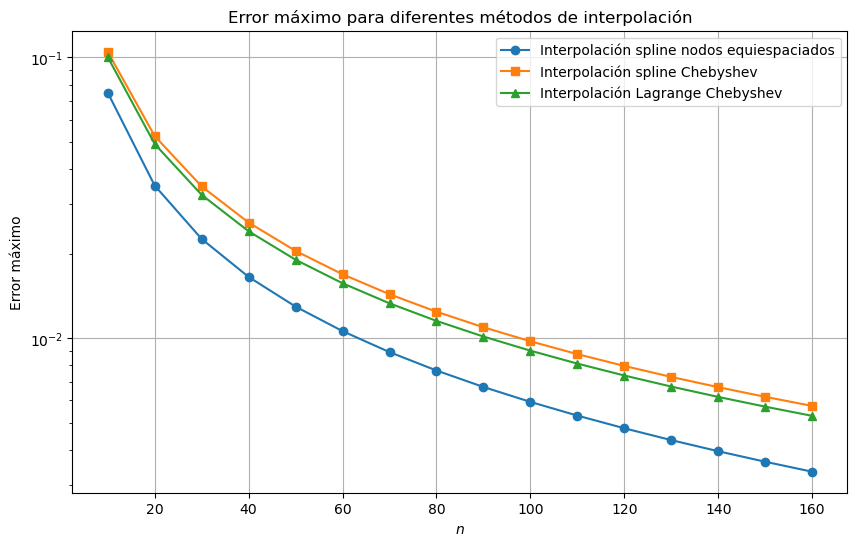

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, BarycentricInterpolator

# Definir la función f(x)
def f(x):
    return np.abs(x) - x / 2 - x ** 2

# Función para calcular nodos de Chebyshev
def nodos_chebyshev(n, a, b):
    k = np.arange(1, n + 1)
    x = np.cos((2 * k - 1) / (2 * n) * np.pi)
    return 0.5 * (a + b) + 0.5 * (b - a) * x

# Definir el intervalo
a, b = -1, 1

# Número de puntos para graficar el error
num_puntos = 1000
x_vals = np.linspace(a, b, num_puntos)
f_vals = f(x_vals)

# Máximo n para interpolación
max_n = 160
ns = np.arange(10, max_n + 1, 10)

# Inicializar listas para almacenar errores máximos
errores_nodos_equiespaciados = []
errores_spline_chebyshev = []
errores_lagrange_chebyshev = []

# Calcular errores para diferentes n
for n in ns:
    # Nodos equiespaciados
    nodos_equiespaciados = np.linspace(a, b, n)
    f_equiespaciados = f(nodos_equiespaciados)
    spline_equiespaciado = interp1d(nodos_equiespaciados, f_equiespaciados, kind='cubic', fill_value="extrapolate")
    error_equiespaciado_spline = np.max(np.abs(f_vals - spline_equiespaciado(x_vals)))
    errores_nodos_equiespaciados.append(error_equiespaciado_spline)
    
    # Nodos de Chebyshev
    nodos_chebyshev_vals = nodos_chebyshev(n, a, b)
    f_chebyshev = f(nodos_chebyshev_vals)
    
    # Interpolación spline de Chebyshev
    spline_chebyshev = interp1d(nodos_chebyshev_vals, f_chebyshev, kind='cubic', fill_value="extrapolate")
    error_spline_chebyshev = np.max(np.abs(f_vals - spline_chebyshev(x_vals)))
    errores_spline_chebyshev.append(error_spline_chebyshev)
    
    # Interpolación de Lagrange con Chebyshev
    lagrange_chebyshev = BarycentricInterpolator(nodos_chebyshev_vals, f_chebyshev)
    error_lagrange_chebyshev = np.max(np.abs(f_vals - lagrange_chebyshev(x_vals)))
    errores_lagrange_chebyshev.append(error_lagrange_chebyshev)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(ns, errores_nodos_equiespaciados, 'o-', label='Interpolación spline nodos equiespaciados')
plt.plot(ns, errores_spline_chebyshev, 's-', label='Interpolación spline Chebyshev')
plt.plot(ns, errores_lagrange_chebyshev, '^-', label='Interpolación Lagrange Chebyshev')
plt.yscale('log')
plt.xlabel('$n$')
plt.ylabel('Error máximo')
plt.legend()
plt.title('Error máximo para diferentes métodos de interpolación')
plt.grid(True)
plt.show()
